In [182]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
#Reads data from Melbourne Housing and Poperty Sales of Melbourne City. Sources claim to be scrapped from domain.com
dataset1 = pd.read_csv("datasets/Melbourne_housing_FULL.csv")
dataset2 = pd.read_csv("datasets/PSMS.csv")

In [186]:
#Takes our two datasets and merges them together into one.
Merged_Data = pd.merge(dataset1,dataset2,how='outer')
Merged_Data.drop(["KeyID"], axis=1, inplace=True)
Merged_Data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             2
Postcode             2
Bedroom2         11686
Bathroom         11697
Car              12304
Landsize         16603
BuildingArea     31749
YearBuilt        28744
CouncilArea       6166
Lattitude        11308
Longtitude       11308
Regionname           4
Propertycount        4
KeyID            34857
dtype: int64

In [155]:
#Drop irrellevant columns and any NaN values. 
#Decided to drop suburb instead of distance. Distance will be easier to work with in a correlative model. 
#Date should be dropped too
data = Merged_Data.drop(["Date","Lattitude", "Suburb", "KeyID","Address", "Method", "SellerG","Postcode","Bathroom","Car", "YearBuilt", "CouncilArea", "Propertycount"], axis = 1)
data = data.dropna()
data.drop_duplicates(inplace = True)
data

,Rooms,Type,Price,Distance,Bedroom2,Landsize,BuildingArea,Longtitude,Regionname
4,2,u,505000.0,3.0,2.0,0.0,38.0,145.00015,Northern Metropolitan
10,2,h,1097000.0,2.5,3.0,220.0,75.0,144.99890,Northern Metropolitan
18,1,u,470000.0,2.5,1.0,0.0,50.0,144.99610,Northern Metropolitan
24,1,u,457000.0,2.5,1.0,0.0,50.0,144.99650,Northern Metropolitan
31,2,u,750000.0,2.5,2.0,0.0,94.0,144.99650,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...
53231,3,h,1190000.0,6.3,3.0,515.0,89.0,144.87725,Western Metropolitan
53236,3,h,796000.0,7.0,3.0,464.0,120.0,144.86380,Western Metropolitan
53238,3,h,955000.0,7.0,3.0,206.0,173.0,144.89650,Western Metropolitan
53240,2,u,381000.0,7.0,2.0,0.0,65.0,144.89530,Western Metropolitan


In [156]:
#We could encode the suburb into a binary format. probably a better way to do this but not sure. Location is surely correlated to price. Perhaps we should use distance to CBD instead?
data = pd.get_dummies(data, columns = ["Regionname"]) 

In [157]:
#Encoding the Type into a binary format. H = house, T = townhouse, U = unit  
data = pd.get_dummies(data, columns = ["Type"])

In [158]:
from sklearn.model_selection import train_test_split
X = data.drop(['Price'], axis = 1)
Y = data['Price']

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [160]:
#Joining the training data back together. 
train_data = X_train.join(Y_train)

<Axes: >

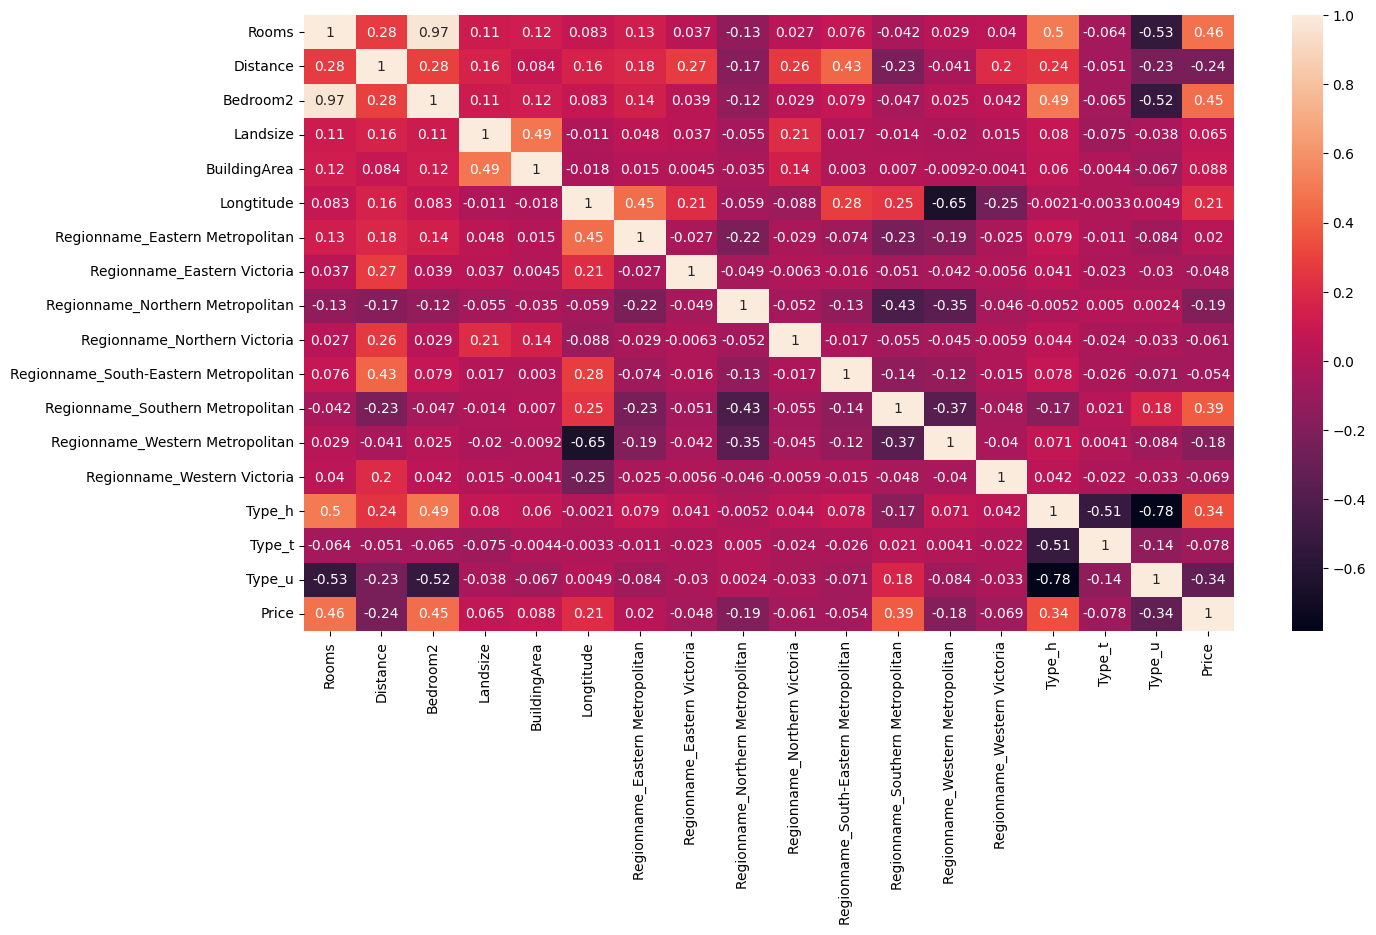

In [161]:
#Correlation of the different variables  
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 2500x1000 with 0 Axes>

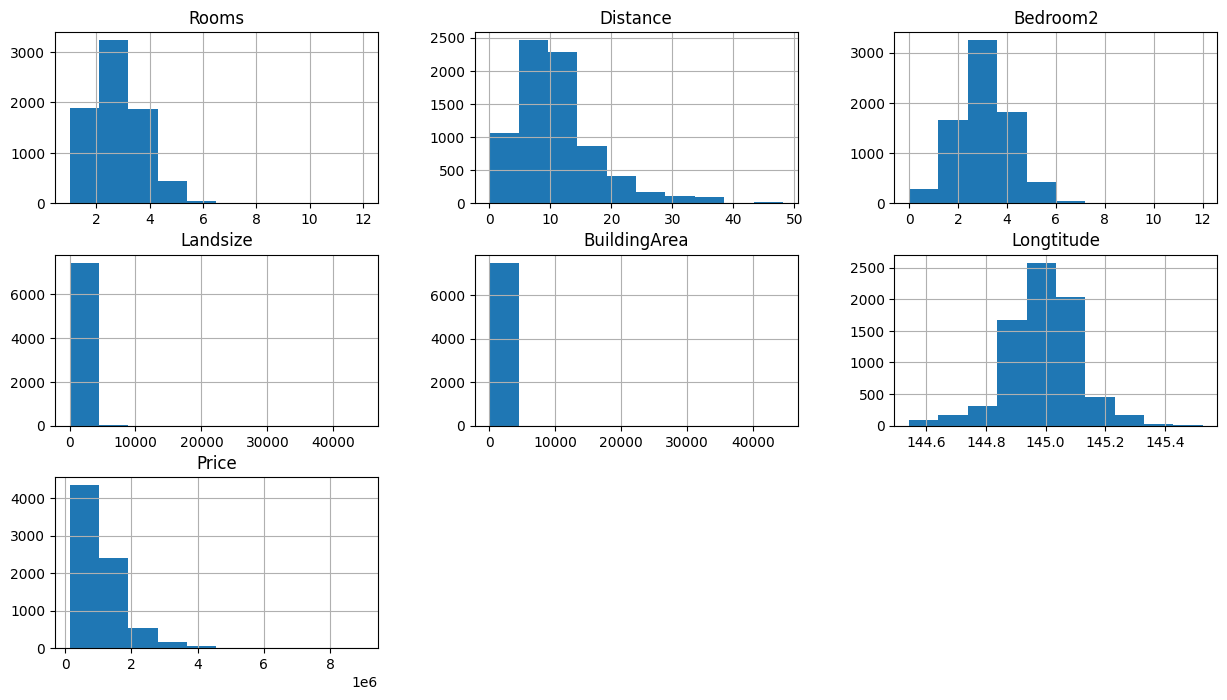

In [162]:
#Features are somewhat skewed, ideally we want a bell curve type distubtion 
plt.figure(figsize=(25,10))
train_data.hist(figsize=(15,8))

In [163]:
#Normalising data using logirithms. 
train_data['Rooms'] = np.log (train_data['Rooms']+1)
train_data['Distance'] = np.log (train_data['Distance']+1)
train_data['Price'] = np.log (train_data['Price']+1)
train_data['Bedroom2'] = np.log (train_data['Bedroom2']+1)
train_data['Landsize'] = np.log (train_data['Landsize']+1)
train_data['BuildingArea'] = np.log (train_data['BuildingArea']+1)
train_data['Longtitude'] = np.log (train_data['Longtitude']+1)



array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

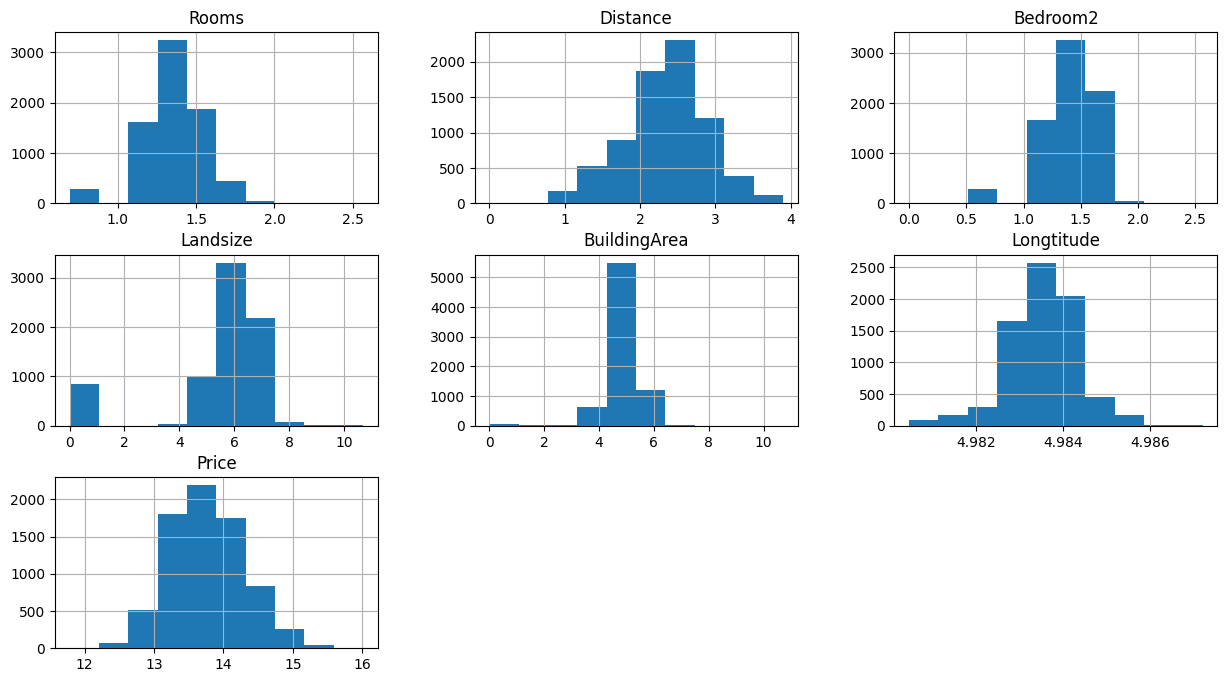

In [164]:
#Showing data after normalising with logarithms. 
train_data.hist(figsize=(15,8))

In [165]:
#Simple Linear Regression model, scaling our training data too. Then lastly fitting training data to line. 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
reg = LinearRegression()
scaler = StandardScaler()
X_train_s= scaler.fit_transform(X_train)
reg.fit(X_train_s,Y_train)

LinearRegression()

In [166]:
#Normalising our test data using logarithms. 
test_data = X_test.join(Y_test)

test_data['Rooms'] = np.log (test_data['Rooms']+1)
test_data['Distance'] = np.log (test_data['Distance']+1)
test_data['Price'] = np.log (test_data['Price']+1)
test_data['Bedroom2'] = np.log (test_data['Bedroom2']+1)
test_data['Landsize'] = np.log (test_data['Landsize']+1)
test_data['BuildingArea'] = np.log (test_data['BuildingArea']+1)
test_data['Landsize'] = np.log (test_data['Landsize']+1)

In [167]:
X_test_s = scaler.transform(X_test)

In [168]:
reg.score(X_test_s,Y_test)

0.5986717615936309

In [169]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [170]:
forest.score(X_test_s,Y_test)

0.8261037671464493

In [173]:
from sklearn.model_selection import GridSearchCV

grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8],
}

grid_search = GridSearchCV(forest,grid, cv = 5,
                           return_train_score= True,
                           scoring="neg_mean_squared_error")

grid_search.fit(X_train_s, Y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [174]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test_s, Y_test)

0.8325564278263213